In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from DarkNews import Cfourvec as Cfv
from alp import exp, plot_tools as pt
from alp import const
from alp import models
from alp import beams
from alp.exp_dicts import EXPERIMENTS

## Experiments

In [56]:
%%prun
alp = models.ALP(0.5, 1e7)
ICARUS      = exp.Experiment('pythia8_events/numi_120GeV.parquet', exp_dic=EXPERIMENTS['ICARUS'], alp=alp, duplicate_taus=1, savemem=False)

         2298 function calls (2218 primitive calls) in 0.329 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        6    0.105    0.018    0.107    0.018 exp.py:323(sample_alp_daughter_4momenta)
        6    0.105    0.017    0.217    0.036 exp.py:365(generate_alp_events)
        1    0.062    0.062    0.282    0.282 exp.py:421(get_alp_events)
        1    0.015    0.015    0.015    0.015 core.py:1389(read)
        1    0.009    0.009    0.010    0.010 pandas_compat.py:755(table_to_dataframe)
        1    0.008    0.008    0.290    0.290 exp.py:553(get_alps_in_acceptance)
        1    0.006    0.006    0.329    0.329 <string>:1(<module>)
        6    0.004    0.001    0.004    0.001 exp.py:312(sample_alp_energy_spectrum)
        3    0.004    0.001    0.004    0.001 take.py:120(_take_nd_ndarray)
       17    0.002    0.000    0.002    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        2    0.001    0.001    0.001    

In [24]:
ICARUS.df_taus['weights'].size/1e6

0.748677

In [3]:
alp = models.ALP(0.5, 1e7)

### Pythia8 tau events
NUMI_files = 'pythia8_events/numi_120GeV.parquet'
SPS_files  = 'pythia8_events/sps_400GeV.parquet'
LHC_files  = 'pythia8_events/lhc_13.6TeV.parquet'


### Creating the experimental classes 
ICARUS      = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS['ICARUS'], alp=alp, duplicate_taus=5, savemem=False)
MICROBOONE  = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS['MicroBooNE'], alp=alp, duplicate_taus=10, savemem=False)
NOVA        = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS['NoVA'], alp=alp, duplicate_taus=5, savemem=False)

DUNE        = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS['DUNE'], alp=alp, savemem=False)
NA62 = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['NA62'], alp=alp, savemem=False)
CHARM = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['CHARM'], alp=alp, savemem=False)
BEBC  = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['BEBC'], alp=alp, savemem=False)
SHIP  = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['SHiP'], alp=alp, savemem=False)
PROTODUNE_NP02 = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['PROTO_DUNE_NP02'], alp=alp, savemem=False)
PROTODUNE_NP04 = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['PROTO_DUNE_NP04'], alp=alp, savemem=False)

FASER  = exp.Experiment(LHC_files, exp_dic=EXPERIMENTS['FASER'], alp=alp, savemem=False)
FASER2 = exp.Experiment(LHC_files, exp_dic=EXPERIMENTS['FASER2'], alp=alp, savemem=False)


In [43]:
alp = models.ALP(0.5, 1e7)

### Pythia8 tau events
NUMI_files_df = 'tau_events/df_120GeV_1e5_ncentral_bcentral.parquet'
SPS_files_df  = 'tau_events/df_400GeV_1e5_ncentral_bcentral.parquet'

### Creating the experimental classes 
ICARUS_df      = exp.Experiment(NUMI_files_df,   exp_dic=EXPERIMENTS['ICARUS'], alp=alp, duplicate_taus=1, savemem=False)
MICROBOONE_df  = exp.Experiment(NUMI_files_df,   exp_dic=EXPERIMENTS['MicroBooNE'], alp=alp, duplicate_taus=1, savemem=False)
NOVA_df        = exp.Experiment(NUMI_files_df,   exp_dic=EXPERIMENTS['NoVA'], alp=alp, duplicate_taus=1, savemem=False)
DUNE_df        = exp.Experiment(NUMI_files_df,   exp_dic=EXPERIMENTS['DUNE'], alp=alp, savemem=False)
CHARM_df = exp.Experiment(SPS_files_df,          exp_dic=EXPERIMENTS['CHARM'], alp=alp, savemem=False)
BEBC_df  = exp.Experiment(SPS_files_df,          exp_dic=EXPERIMENTS['BEBC'], alp=alp, savemem=False)
SHIP_df  = exp.Experiment(SPS_files_df,          exp_dic=EXPERIMENTS['SHiP'], alp=alp, savemem=False)
PROTODUNE_NP02_df = exp.Experiment(SPS_files_df, exp_dic=EXPERIMENTS['PROTO_DUNE_NP02'], alp=alp, savemem=False)
PROTODUNE_NP04_df = exp.Experiment(SPS_files_df, exp_dic=EXPERIMENTS['PROTO_DUNE_NP04'], alp=alp, savemem=False)

In [4]:
alp = models.ALP(0.5, 1e7)

n_events = 100_000
NUMI_files = f"tau_events/df_NuMI_{n_events}_custom_parametrization.parquet"
SPS_files  = f"tau_events/df_SPS_{n_events}_custom_parametrization.parquet"
LHC_files  = f"tau_events/df_LHC_{n_events}_custom_parametrization.parquet"

### Creating the experimental classes 
ICARUS_params = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS['ICARUS'], alp=alp, duplicate_taus=1, savemem=False)
MICROBOONE_params = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS['MicroBooNE'], alp=alp, duplicate_taus=1, savemem=False)
NOVA_params = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS['NoVA'], alp=alp, duplicate_taus=1, savemem=False)
DUNE_params = exp.Experiment(NUMI_files, exp_dic=EXPERIMENTS['DUNE'], alp=alp, savemem=False)
NA62_params = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['NA62'], alp=alp, savemem=False)
CHARM_params = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['CHARM'], alp=alp, savemem=False)
BEBC_params = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['BEBC'], alp=alp, savemem=False)
SHIP_params = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['SHiP'], alp=alp, savemem=False)
PROTODUNE_NP02_params = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['PROTO_DUNE_NP02'], alp=alp, savemem=False)
PROTODUNE_NP04_params = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['PROTO_DUNE_NP04'], alp=alp, savemem=False)
FASER_params = exp.Experiment(LHC_files, exp_dic=EXPERIMENTS['FASER'], alp=alp, savemem=False)
FASER2_params = exp.Experiment(LHC_files, exp_dic=EXPERIMENTS['FASER2'], alp=alp, savemem=False)


# Number of Tau+/Tau- events

In [5]:
print(f"Tau asymmetry in NUMI: {sum(ICARUS.df_taus['weights'][ICARUS.df_taus['pid'] == -15]) / sum(ICARUS.df_taus['weights'][ICARUS.df_taus['pid'] == +15]):.3g}")
print(f"Tau asymmetry in SPS: {sum(CHARM.df_taus['weights'][CHARM.df_taus['pid'] == -15]) / sum(CHARM.df_taus['weights'][CHARM.df_taus['pid'] == +15]):.3g}")
print(f"Tau asymmetry in LHC: {sum(FASER.df_taus['weights'][FASER.df_taus['pid'] == -15]) / sum(FASER.df_taus['weights'][FASER.df_taus['pid'] == +15]):.5g}")

Tau asymmetry in NUMI: 0.72
Tau asymmetry in SPS: 0.84
Tau asymmetry in LHC: 0.99803


In [6]:
print(f"Tau asymmetry in NUMI: {sum(ICARUS_params.df_taus['weights'][ICARUS_params.df_taus['pid'] == -15]) / sum(ICARUS_params.df_taus['weights'][ICARUS_params.df_taus['pid'] == +15]):.3g}")
print(f"Tau asymmetry in SPS: {sum(CHARM_params.df_taus['weights'][CHARM_params.df_taus['pid'] == -15]) / sum(CHARM_params.df_taus['weights'][CHARM_params.df_taus['pid'] == +15]):.3g}")
print(f"Tau asymmetry in LHC: {sum(FASER_params.df_taus['weights'][FASER_params.df_taus['pid'] == -15]) / sum(FASER_params.df_taus['weights'][FASER_params.df_taus['pid'] == +15]):.5g}")

Tau asymmetry in NUMI: 1
Tau asymmetry in SPS: 1
Tau asymmetry in LHC: 1


In [7]:
# NUMI_taus_params = ICARUS_params.df_taus
NUMI_taus = ICARUS.df_taus
SPS_taus  = CHARM.df_taus
LHC_taus = FASER.df_taus

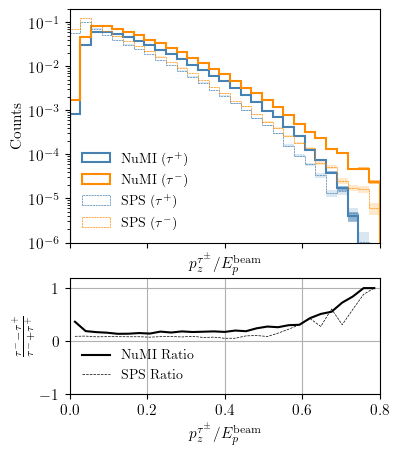

In [8]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(4, 5), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)

bins = np.linspace(0, 0.8, 30)

# pt.plot_hist_with_errors(ax, NUMI_taus_params['pz'][NUMI_taus_params['pid'] == -15]/120, NUMI_taus_params['weights'][NUMI_taus_params['pid'] == -15], bins, r'NuMI ($\tau^+$)', 'black', nevents=len(NUMI_taus_params))
# pt.plot_hist_with_errors(ax, NUMI_taus_params['pz'][NUMI_taus_params['pid'] == +15]/120, NUMI_taus_params['weights'][NUMI_taus_params['pid'] == +15], bins, r'NuMI ($\tau^-$)', 'grey', nevents=len(NUMI_taus_params))

pt.plot_hist_with_errors(ax, NUMI_taus['pz'][NUMI_taus['pid'] == -15]/120, NUMI_taus['weights'][NUMI_taus['pid'] == -15], bins, r'NuMI ($\tau^+$)', 'steelblue', nevents=len(NUMI_taus))
pt.plot_hist_with_errors(ax, NUMI_taus['pz'][NUMI_taus['pid'] == +15]/120, NUMI_taus['weights'][NUMI_taus['pid'] == +15], bins, r'NuMI ($\tau^-$)', 'darkorange', nevents=len(NUMI_taus))

pt.plot_hist_with_errors(ax, SPS_taus['pz'][SPS_taus['pid'] == -15]/400, SPS_taus['weights'][SPS_taus['pid'] == -15], bins, r'SPS ($\tau^+$)', 'steelblue', nevents=len(SPS_taus), lw=0.5, ls=(1,(3,1)), alpha=0.2)
pt.plot_hist_with_errors(ax, SPS_taus['pz'][SPS_taus['pid'] == +15]/400, SPS_taus['weights'][SPS_taus['pid'] == +15], bins, r'SPS ($\tau^-$)', 'darkorange', nevents=len(SPS_taus), lw=0.5, ls=(1,(3,1)), alpha=0.2)

numi_plus  = np.histogram(NUMI_taus['pz'][NUMI_taus['pid'] == +15]/120, bins=bins)[0]
numi_minus = np.histogram(NUMI_taus['pz'][NUMI_taus['pid'] == -15]/120, bins=bins)[0]
numi_ratio = (numi_plus - numi_minus) / (numi_plus + numi_minus)
# unc_numi_ratio = (numi_plus - numi_minus) / (numi_plus + numi_minus)

sps_plus = np.histogram(SPS_taus['pz'][SPS_taus['pid'] == +15]/400, bins=bins)[0]
sps_minus = np.histogram(SPS_taus['pz'][SPS_taus['pid'] == -15]/400, bins=bins)[0]
sps_ratio = (sps_plus - sps_minus) / (sps_plus + sps_minus)

bin_centers = (bins[:-1] + bins[1:]) / 2
ax2.plot(bin_centers, numi_ratio, label=r"NuMI Ratio", color="black", lw=1.5)
ax2.plot(bin_centers, sps_ratio, label=r"SPS Ratio", color="black", lw=0.5, linestyle="--")
ax2.set_ylabel(r"$\frac{{\tau^-} - {\tau^+}}{{\tau^-} + {\tau^+}}$")
ax2.legend(loc="lower left")
# ax2.hlines(y=0, xmin=0, xmax=1, color="black", lw=0.5)
ax2.grid(which='both')
ax.legend()
ax.set_yscale("log")
ax.set_xlabel(r"${p_z^{\tau^\pm}}/{E_p^{\rm beam}}$")
ax2.set_xlabel(r"${p_z^{\tau^\pm}}/{E_p^{\rm beam}}$")
ax.set_ylabel("Counts")
ax.set_xlim(0, bins.max())
ax.set_ylim(1e-6, 0.2)
ax2.set_ylim(-1, 1.2)
fig.savefig('plots/tau_asymmetry.pdf', bbox_inches='tight')

In [9]:
def get_xF(p4, p_beam):
    n_events = np.shape(p4)[0]
    p4_beam = np.zeros((n_events, 4))
    p4_beam[:, 0] = np.ones(n_events) * np.sqrt(const.m_proton**2 + p_beam**2)
    p4_beam[:, 3] = np.ones(n_events) * p_beam
    beta = p_beam / (np.sqrt(p_beam**2 + const.m_proton**2) + const.m_proton) * np.ones(n_events)
    p4_CM = Cfv.L(p4, beta)
    p4_beam_CM = Cfv.L(p4_beam, beta)

    return p4_CM[:,-1]/p4_beam_CM[:,-1]

def get_pTSQR(p4):
    pT = Cfv.getXYnorm(p4)
    return pT**2

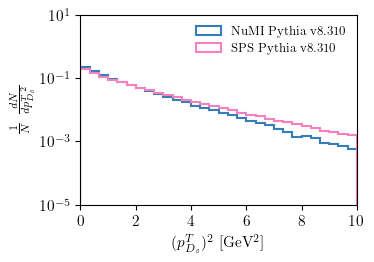

In [12]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
b = np.linspace(0, 10, 31)

p4, w = ICARUS.get_parent_p4(), ICARUS.tau_weights
mask =  (np.abs(ICARUS.df_taus['mother_pid']) == 431)
pt.plot_hist_with_errors(ax, get_pTSQR(p4[mask])*xunits, w[mask]/w[mask].sum(), b, r'NuMI Pythia v8.310', pt.CB_color_cycle[0], nevents=ICARUS.nevents)

# p4, w = ICARUS_params.get_parent_p4(), ICARUS_params.tau_weights
# pt.plot_hist_with_errors(ax, get_pTSQR(p4)*xunits, w/w.sum(), b, r'NuMI parametric', pt.CB_color_cycle[0], ls=(1,(2,1)), nevents=ICARUS_params.nevents, lw=0.5)

p4, w = SHIP.get_parent_p4(), SHIP.tau_weights
mask =  (np.abs(SHIP.df_taus['mother_pid']) == 431)
pt.plot_hist_with_errors(ax, get_pTSQR(p4[mask])*xunits, w[mask]/w[mask].sum(), b, r'SPS Pythia v8.310', pt.CB_color_cycle[1], nevents=SHIP.nevents)

# p4, w = SHIP_df.get_parent_p4(), SHIP_df.tau_weights
# mask =  (np.abs(SHIP_df.df_taus['mother_pid']) == 431)
# pt.plot_hist_with_errors(ax, get_pTSQR(p4[mask])*xunits, w[mask]/w[mask].sum(), b, r'SPS parametric', pt.CB_color_cycle[1], ls=(1,(1,1)), nevents=SHIP_df.nevents, lw=0.5)
# # 

ax.set_yscale('log')
# # ax.set_xscale('log')
ax.set_xlabel(r'$(p_{D_s}^T)^2$ [GeV$^2$]')
ax.set_ylabel(r'$\frac{1}{N}$ $\frac{dN}{d p_{D_s}^{T\,2}}$')
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-5, 10)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=9, ncol=1)
fig.savefig('plots/Parent_pTSQR_spectrum.pdf', bbox_inches='tight')

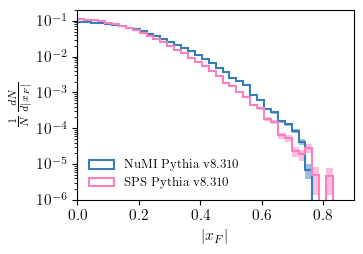

In [14]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
b = np.linspace(0, 0.9, 41)

p4, w = ICARUS.get_parent_p4(), ICARUS.tau_weights
mask =  (np.abs(ICARUS.df_taus['mother_pid']) == 431)
pt.plot_hist_with_errors(ax, abs(get_xF(p4[mask], p_beam=120))*xunits, w[mask]/np.sum(w[mask]), b, r'NuMI Pythia v8.310', pt.CB_color_cycle[0], nevents=ICARUS.nevents)

# p4, w = ICARUS_df.get_parent_p4(), ICARUS_df.tau_weights
# mask =  (np.abs(ICARUS_df.df_taus['mother_pid']) == 431)
# pt.plot_hist_with_errors(ax, abs(get_xF(p4[mask], p_beam=120))*xunits, w[mask]/np.sum(w[mask]), b, r'NuMI parametric', pt.CB_color_cycle[0], ls=(1,(2,1)), nevents=ICARUS_df.nevents, lw=0.5)

p4, w = SHIP.get_parent_p4(), SHIP.tau_weights
mask =  (np.abs(SHIP.df_taus['mother_pid']) == 431)
pt.plot_hist_with_errors(ax, abs(get_xF(p4[mask], p_beam=400))*xunits, w[mask]/np.sum(w[mask]), b, r'SPS Pythia v8.310', pt.CB_color_cycle[1], nevents=SHIP.nevents)

# p4, w = SHIP_df.get_parent_p4(), SHIP_df.tau_weights
# mask =  (np.abs(SHIP_df.df_taus['mother_pid']) == 431)
# pt.plot_hist_with_errors(ax, abs(get_xF(p4[mask], p_beam=400))*xunits, w[mask]/np.sum(w[mask]), b, r'SPS parametric', pt.CB_color_cycle[1], ls=(1,(1,1)), nevents=SHIP_df.nevents, lw=0.5)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$|x_F|$')
ax.set_ylabel(r'$\frac{1}{N}\frac{dN}{d |x_F|}$')
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-6, 0.2)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='lower left', fontsize=9, ncol=1)
fig.savefig('plots/Parent_xF_spectrum.pdf', bbox_inches='tight')

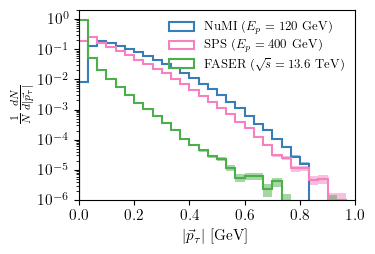

In [18]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
b = np.linspace(0, 1, 31)

p4, w = ICARUS.p4_taus, ICARUS.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits/120, w/np.sum(w), b, r'NuMI ($E_p = 120$~GeV)', pt.CB_color_cycle[0], nevents=ICARUS.nevents)

p4, w = SHIP.p4_taus, SHIP.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits/400, w/np.sum(w), b, r'SPS ($E_p = 400$~GeV)', pt.CB_color_cycle[1], nevents=SHIP.nevents)

p4, w = FASER.p4_taus, FASER.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits/13.6e3*2, w/np.sum(w), b, r'FASER ($\sqrt{s} = 13.6$~TeV)', pt.CB_color_cycle[2], nevents=FASER.nevents)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$|\vec{p}_{\tau}|$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d |\vec{p}_{\tau}|}$', fontsize=12)
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-6, 2)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=9, ncol=1)
fig.savefig('plots/tau_energy_spectrum.pdf', bbox_inches='tight')

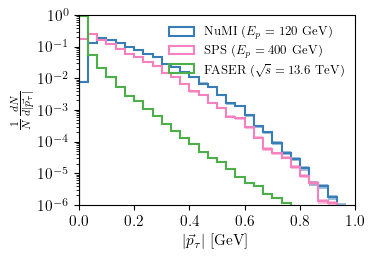

In [20]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
b = np.linspace(0, 1, 31)

p4, w = ICARUS_params.p4_taus, ICARUS_params.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits/120, w/np.sum(w), b, r'NuMI ($E_p = 120$~GeV)', pt.CB_color_cycle[0], nevents=ICARUS.nevents)

p4, w = SHIP_params.p4_taus, SHIP_params.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits/400, w/np.sum(w), b, r'SPS ($E_p = 400$~GeV)', pt.CB_color_cycle[1], nevents=SHIP.nevents)

p4, w = FASER_params.p4_taus, FASER_params.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits/13.6e3*2, w/np.sum(w), b, r'FASER ($\sqrt{s} = 13.6$~TeV)', pt.CB_color_cycle[2], nevents=FASER.nevents)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$|\vec{p}_{\tau}|$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d |\vec{p}_{\tau}|}$', fontsize=12)
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-6, 1)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=9, ncol=1)
fig.savefig('plots/tau_energy_spectrum_param.pdf', bbox_inches='tight')

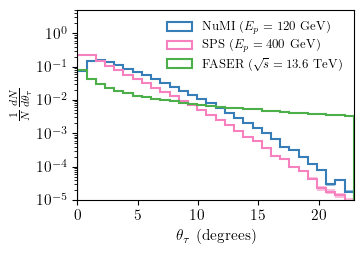

In [21]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 180/np.pi
b = np.linspace(0, 0.4, 31)*xunits

p4, w = ICARUS.p4_taus, ICARUS.tau_weights
pt.plot_hist_with_errors(ax, np.arccos(Cfv.get_cosTheta(p4))*xunits, w/np.sum(w), b, r'NuMI ($E_p = 120$~GeV)', pt.CB_color_cycle[0], nevents=ICARUS.nevents)

p4, w = SHIP.p4_taus, SHIP.tau_weights
pt.plot_hist_with_errors(ax, np.arccos(Cfv.get_cosTheta(p4))*xunits, w/np.sum(w), b, r'SPS ($E_p = 400$~GeV)', pt.CB_color_cycle[1], nevents=SHIP.nevents)

p4, w = FASER.p4_taus, FASER.tau_weights
pt.plot_hist_with_errors(ax, np.arccos(Cfv.get_cosTheta(p4))*xunits, w/np.sum(w), b, r'FASER ($\sqrt{s} = 13.6$~TeV)', pt.CB_color_cycle[2], nevents=FASER.nevents)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{\tau}$ (degrees)') 
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d \theta_{\tau}}$', fontsize=12)
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-5, 5)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=9, ncol=1)
fig.savefig('plots/tau_angular_spectrum.pdf', bbox_inches='tight')

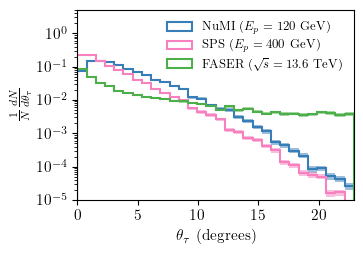

In [22]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 180/np.pi
b = np.linspace(0, 0.4, 31)*xunits

p4, w = ICARUS_params.p4_taus, ICARUS_params.tau_weights
pt.plot_hist_with_errors(ax, np.arccos(Cfv.get_cosTheta(p4))*xunits, w/np.sum(w), b, r'NuMI ($E_p = 120$~GeV)', pt.CB_color_cycle[0], nevents=ICARUS_params.nevents)

p4, w = SHIP_params.p4_taus, SHIP_params.tau_weights
pt.plot_hist_with_errors(ax, np.arccos(Cfv.get_cosTheta(p4))*xunits, w/np.sum(w), b, r'SPS ($E_p = 400$~GeV)', pt.CB_color_cycle[1], nevents=SHIP_params.nevents)

p4, w = FASER_params.p4_taus, FASER_params.tau_weights
pt.plot_hist_with_errors(ax, np.arccos(Cfv.get_cosTheta(p4))*xunits, w/np.sum(w), b, r'FASER ($\sqrt{s} = 13.6$~TeV)', pt.CB_color_cycle[2], nevents=FASER_params.nevents)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{\tau}$ (degrees)') 
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d \theta_{\tau}}$', fontsize=12)
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-5, 5)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=9, ncol=1)
fig.savefig('plots/tau_angular_spectrum_params.pdf', bbox_inches='tight')

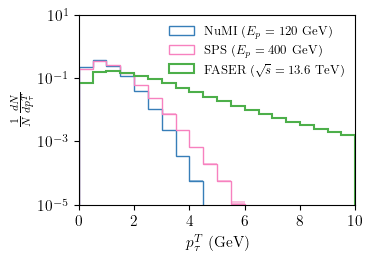

In [23]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
b = np.linspace(0, 10, 21)

p4, w = ICARUS.p4_taus, ICARUS.tau_weights
pt.plot_hist_with_errors(ax, Cfv.getXYnorm(p4)*xunits, w, b, r'NuMI ($E_p = 120$~GeV)', pt.CB_color_cycle[0], nevents=ICARUS.nevents, lw=1)

p4, w = SHIP.p4_taus, SHIP.tau_weights
pt.plot_hist_with_errors(ax, Cfv.getXYnorm(p4)*xunits, w, b, r'SPS ($E_p = 400$~GeV)', pt.CB_color_cycle[1], nevents=SHIP.nevents, lw=1)

p4, w = FASER.p4_taus, FASER.tau_weights
pt.plot_hist_with_errors(ax, Cfv.getXYnorm(p4)*xunits, w, b, r'FASER ($\sqrt{s} = 13.6$~TeV)', pt.CB_color_cycle[2], nevents=FASER.nevents)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$p^T_{\tau}$ (GeV)')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d p^T_{\tau}}$', fontsize=12)
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-5, 10)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=9, ncol=1)
fig.savefig('plots/tau_pT_spectrum.pdf', bbox_inches='tight')

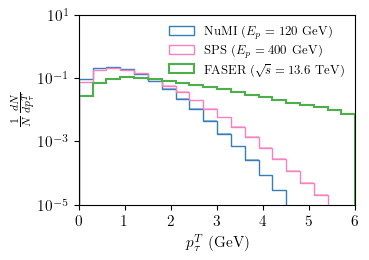

In [24]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
b = np.linspace(0, 6, 21)

p4, w = ICARUS_params.p4_taus, ICARUS_params.tau_weights
pt.plot_hist_with_errors(ax, Cfv.getXYnorm(p4)*xunits, w, b, r'NuMI ($E_p = 120$~GeV)', pt.CB_color_cycle[0], nevents=ICARUS_params.nevents, lw=1)

p4, w = SHIP_params.p4_taus, SHIP_params.tau_weights
pt.plot_hist_with_errors(ax, Cfv.getXYnorm(p4)*xunits, w, b, r'SPS ($E_p = 400$~GeV)', pt.CB_color_cycle[1], nevents=SHIP_params.nevents, lw=1)

p4, w = FASER_params.p4_taus, FASER_params.tau_weights
pt.plot_hist_with_errors(ax, Cfv.getXYnorm(p4)*xunits, w, b, r'FASER ($\sqrt{s} = 13.6$~TeV)', pt.CB_color_cycle[2], nevents=FASER_params.nevents)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$p^T_{\tau}$ (GeV)')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d p^T_{\tau}}$', fontsize=12)
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-5, 10)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=9, ncol=1)
fig.savefig('plots/tau_pT_spectrum_params.pdf', bbox_inches='tight')

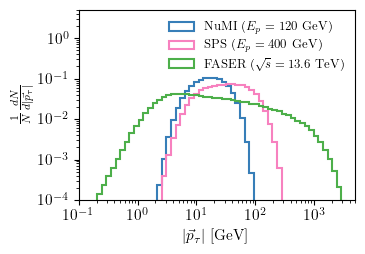

In [26]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
b = np.geomspace(0.1, 5e3, 61)

p4, w = ICARUS.p4_taus, ICARUS.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, w/np.sum(w), b, r'NuMI ($E_p = 120$~GeV)', pt.CB_color_cycle[0], nevents=ICARUS.nevents)

p4, w = SHIP.p4_taus, SHIP.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, w/np.sum(w), b, r'SPS ($E_p = 400$~GeV)', pt.CB_color_cycle[1], nevents=SHIP.nevents)

p4, w = FASER.p4_taus, FASER.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, w/np.sum(w), b, r'FASER ($\sqrt{s} = 13.6$~TeV)', pt.CB_color_cycle[2], nevents=FASER.nevents)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$|\vec{p}_{\tau}|$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N}\frac{dN}{d |\vec{p}_{\tau}|}$', fontsize=12)
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-4, 5)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=9, ncol=1)
fig.savefig('plots/tau_energy_spectrum.pdf', bbox_inches='tight')

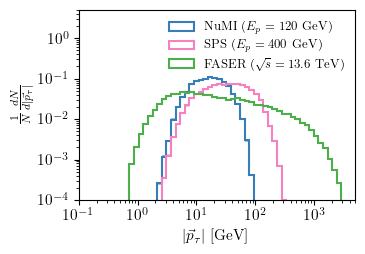

In [28]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
b = np.geomspace(0.1, 5e3, 61)

p4, w = ICARUS_params.p4_taus, ICARUS_params.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, w, b, r'NuMI ($E_p = 120$~GeV)', pt.CB_color_cycle[0], nevents=ICARUS_params.nevents)

p4, w = SHIP_params.p4_taus, SHIP_params.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, w, b, r'SPS ($E_p = 400$~GeV)', pt.CB_color_cycle[1], nevents=SHIP_params.nevents)

p4, w = FASER_params.p4_taus, FASER_params.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, w, b, r'FASER ($\sqrt{s} = 13.6$~TeV)', pt.CB_color_cycle[2], nevents=FASER_params.nevents)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$|\vec{p}_{\tau}|$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N}\frac{dN}{d |\vec{p}_{\tau}|}$', fontsize=12)
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-4, 5)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=9, ncol=1)
fig.savefig('plots/tau_energy_spectrum_params.pdf', bbox_inches='tight')

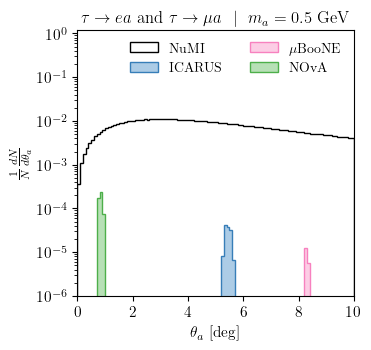

In [30]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 180 / np.pi
b = np.linspace(0, 10, 101)

#######################################################
p4, w = ICARUS.get_alp_events(alp=alp)
WNORM = np.sum(w)
ax.hist(np.arccos(Cfv.get_cosTheta(p4))*xunits, bins=b, weights=w/WNORM, label='NuMI', histtype='stepfilled', edgecolor='black', facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w = ICARUS.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(np.arccos(Cfv.get_cosTheta(p4))*xunits, bins=b, weights=w/WNORM, label='ICARUS', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.2)

p4, w = MICROBOONE.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(np.arccos(Cfv.get_cosTheta(p4))*xunits, bins=b, weights=w/WNORM, label=r'$\mu$BooNE', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)

p4, w = NOVA.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(np.arccos(Cfv.get_cosTheta(p4))*xunits, bins=b, weights=w/WNORM, label=r'NOvA', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.4), linestyle='-', density=False, zorder=1.2)


#######################################################
# p4, w = ICARUS_params.get_alp_events(alp=alp)
# WNORM = np.sum(w)
# ax.hist(np.arccos(Cfv.get_cosTheta(p4))*xunits, bins=b, weights=w/WNORM, label='NuMI', histtype='stepfilled', edgecolor='black', facecolor='None', linestyle='--', density=False, zorder=1.9)

# p4, w = ICARUS_params.get_alps_in_acceptance(generate_events=False, alp=alp)
# ax.hist(np.arccos(Cfv.get_cosTheta(p4))*xunits, bins=b, weights=w/WNORM, label='ICARUS', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='--', density=False, zorder=1.2)

# p4, w = MICROBOONE_params.get_alps_in_acceptance(generate_events=True, alp=alp)
# ax.hist(np.arccos(Cfv.get_cosTheta(p4))*xunits, bins=b, weights=w/WNORM, label=r'$\mu$BooNE', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='--', density=False, zorder=1.2)

# p4, w = NOVA_params.get_alps_in_acceptance(generate_events=True, alp=alp)
# ax.hist(np.arccos(Cfv.get_cosTheta(p4))*xunits, bins=b, weights=w/WNORM, label=r'NOvA', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.4), linestyle='--', density=False, zorder=1.2)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d \theta_a}$', fontsize=12)
ax.set_xlim(0,b.max())
ax.set_ylim(1e-5, 1.2)
ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=10, ncol=2)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=12)
fig.savefig('plots/NuMI_alp_angular_spectrum.pdf', bbox_inches='tight')

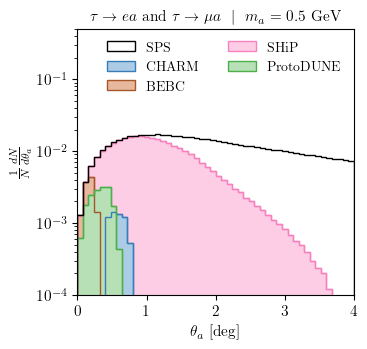

In [44]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e8)
xunits = 180 / np.pi
b = np.linspace(0, 4, 51)

p4, w = CHARM.get_alp_events(alp=alp)
WNORM = np.sum(w)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='SPS', histtype='stepfilled', edgecolor='black', facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w = CHARM.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='CHARM', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.3)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], facecolor='None', linestyle='-', density=False, zorder=1.8)

p4, w = BEBC.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='BEBC', histtype='stepfilled', edgecolor=pt.CB_color_cycle[5], facecolor=pt.lighten_color(pt.CB_color_cycle[5], 0.4), linestyle='-', density=False, zorder=1.3)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[5], facecolor='None', linestyle='-', density=False, zorder=1.8)

p4, w = SHIP.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'SHiP', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], facecolor='None', linestyle='-', density=False, zorder=1.8)

p4, w = PROTODUNE_NP02.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'ProtoDUNE', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.4), linestyle='-', density=False, zorder=1.4)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], facecolor='None', linestyle='-', density=False, zorder=1.8)


# p4, w = NA62.get_alps_in_acceptance(generate_events=True, alp=alp)
# ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'NA62', histtype='stepfilled', edgecolor=pt.CB_color_cycle[-1], facecolor=pt.lighten_color(pt.CB_color_cycle[-1], 0.4), linestyle='-', density=False, zorder=1.3)
# ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[-1], facecolor='None', linestyle='-', density=False, zorder=1.8)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d \theta_a}$', fontsize=12)
ax.set_xlim(0,b.max())
ax.set_ylim(1e-4, 0.5)
ax.set_yticks(np.geomspace(1e-4, 0.1, 4))
ax.legend(loc='upper right', fontsize=10, ncol=2)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/SPS_alp_angular_spectrum.pdf', bbox_inches='tight')

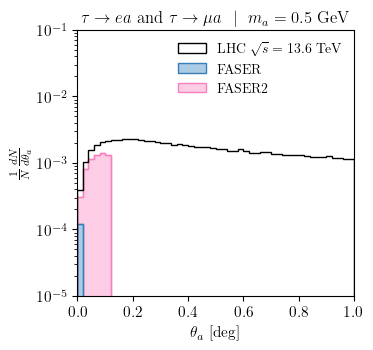

In [32]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 180 / np.pi
b = np.linspace(0, 1, 51)

p4, w = FASER2.get_alp_events(alp=alp)
WNORM = np.sum(w)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w, label=r'LHC $\sqrt{s} = 13.6$~TeV', histtype='stepfilled', edgecolor='black', facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w = FASER.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='FASER', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.3)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights =w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], facecolor='None', linestyle='-', density=False, zorder=1.8)

p4, w = FASER2.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'FASER2', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], facecolor='None', linestyle='-', density=False, zorder=1.8)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d \theta_a}$', fontsize=12)
ax.set_xlim(0,b.max())
ax.set_ylim(1e-5, 1e-1)
# ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=12)
fig.savefig('plots/LHC_alp_angular_spectrum.pdf', bbox_inches='tight')

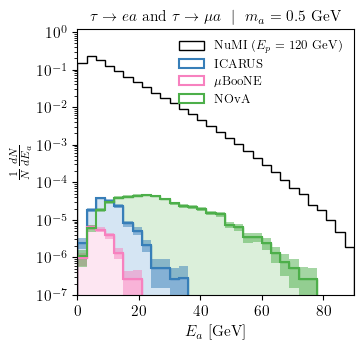

In [33]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(m_a=0.5, f_a=1e5)
xunits = 1
BINS = np.linspace(0, 90, 31)

p4_alp, w = ICARUS.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4_alp[:,0], bins=BINS, weights=w/WNORM, label='NuMI ($E_p = 120$~GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False)

p4, w = ICARUS.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'ICARUS', pt.CB_color_cycle[0], nevents=ICARUS.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=1.1)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)


p4, w = MICROBOONE.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, '$\mu$BooNE', pt.CB_color_cycle[1], nevents=MICROBOONE.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1.2)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)


p4, w = NOVA.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'NOvA', pt.CB_color_cycle[2], nevents=NOVA.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.2), linestyle='-', density=False, zorder=1.0)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)


# p4_alp, w, channels = ICARUS_df.get_alp_events(alp=alp)
# WNORM = w.sum()
# ax.hist(p4_alp[:,0], bins=BINS, weights=w/WNORM, label='NuMI ($E_p = 120$~GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='--', density=False)

# p4, w, channels = ICARUS_df.get_alps_in_acceptance(generate_events=True, alp=alp)
# pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'ICARUS', pt.CB_color_cycle[0], nevents=ICARUS.nevents)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='--', density=False, zorder=1.1)
# # ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)


# p4, w, channels = MICROBOONE_df.get_alps_in_acceptance(generate_events=True, alp=alp)
# pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, '$\mu$BooNE', pt.CB_color_cycle[1], nevents=MICROBOONE.nevents)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='--', density=False, zorder=1.2)
# # ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)


# p4, w, channels = NOVA_df.get_alps_in_acceptance(generate_events=True, alp=alp)
# pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'NOvA', pt.CB_color_cycle[2], nevents=NOVA.nevents)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.2), linestyle='--', density=False, zorder=1.0)
# # ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)


ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d E_a}$', fontsize=12)
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-7, 1.2)
ax.set_yticks(np.geomspace(1e-7, 1, 8))
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/NuMI_alp_spectrum_LFV.pdf', bbox_inches='tight')

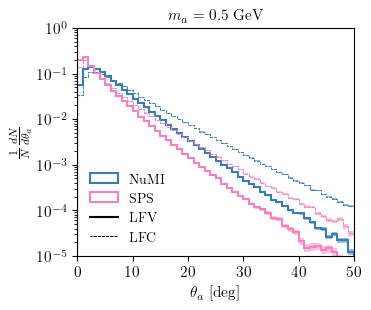

In [35]:
fig,ax = pt.std_fig(figsize=(3.5,3))

xunits = 180 / np.pi
b = np.linspace(0, 50, 51)
mALP = 0.5
alp = models.ALP(mALP, 1e5, c_lepton=np.diag([1,1,1]))
ICARUS.get_alp_events(alp=alp)
CHARM.get_alp_events(alp=alp)
# FASER.get_alp_events(alp=alp)

pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(ICARUS.p4_alp)*xunits, ICARUS.weights/np.sum(ICARUS.weights), b, 'NuMI', pt.CB_color_cycle[0], nevents=ICARUS.nevents)
pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(CHARM.p4_alp)*xunits, CHARM.weights/np.sum(CHARM.weights), b, 'SPS', pt.CB_color_cycle[1], nevents=CHARM.nevents)
# pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(FASER.p4_alp)*xunits, FASER.weights/np.sum(FASER.weights), b, 'LHC $13.6$~TeV', 'grey', nevents=FASER.nevents)

alp = models.ALP(mALP, 1e5, c_lepton=np.ones((3,3)))
ICARUS.get_alp_events(alp=alp)
CHARM.get_alp_events(alp=alp)
# FASER.get_alp_events(alp=alp)

pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(ICARUS.p4_alp)*xunits, ICARUS.weights/np.sum(ICARUS.weights), b, None, pt.CB_color_cycle[0], nevents=ICARUS.nevents, ls=(1,(3,1)), lw=0.75)
pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(CHARM.p4_alp)*xunits, CHARM.weights/np.sum(CHARM.weights), b, None, pt.CB_color_cycle[1], nevents=CHARM.nevents, ls=(1,(3,1)), lw=0.75)
# pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(FASER.p4_alp)*xunits, FASER.weights/np.sum(FASER.weights), b, None, 'grey', nevents=FASER.nevents, ls=(1,(3,1)), lw=0.75)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$\frac{1}{N}\frac{dN}{d \theta_a}$', fontsize=12)
ax.set_xlim(0,b.max())
ax.set_ylim(1e-5, 1)

ax.set_yticks(np.geomspace(1e-5, 1, 6))
# l1 = ax.legend(loc='upper right', fontsize=10, ncol=1)

l = []
# l.append(ax.plot([],[], ls='-', color=pt.CB_color_cycle[0], lw=0, label='\,\,')[0])
l.append(ax.plot([],[], ls='-', color='black', lw=1.5, label='LFV')[0])
l.append(ax.plot([],[], ls=(1,(3,1)), color='black', lw=0.75, label='LFC')[0])
# ax.add_artist(l1)
ax.legend(loc='lower left', fontsize=10, ncol=1)
ax.set_title(fr'$m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/All_alp_angular_spectrum_LFC.pdf', bbox_inches='tight')

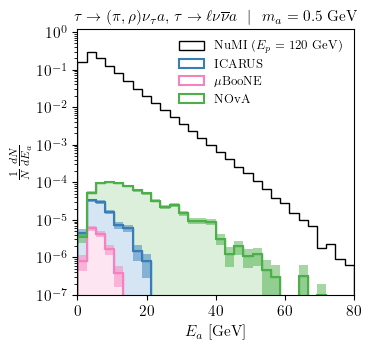

In [37]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(m_a=0.5, f_a=1e5, c_lepton=np.diag([1,1,1]))

xunits = 1
BINS = np.linspace(0, 80, 31)

p4_alp, w = NOVA.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4_alp[:,0], bins=BINS, weights=w/WNORM, label=r'NuMI ($E_p = 120$~GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False)

p4, w = ICARUS.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'ICARUS', pt.CB_color_cycle[0], nevents=ICARUS.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=1.1)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)


p4, w = MICROBOONE.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, '$\mu$BooNE', pt.CB_color_cycle[1], nevents=MICROBOONE.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1.2)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)


p4, w = NOVA.get_alps_in_acceptance(generate_events=False, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'NOvA', pt.CB_color_cycle[2], nevents=NOVA.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.2), linestyle='-', density=False, zorder=1.0)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d E_a}$', fontsize=12)
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-7, 1.2)
ax.set_yticks(np.geomspace(1e-7, 1, 8))
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to (\pi,\rho)\nu_\tau a$, $\tau \to \ell \nu \overline\nu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/NuMI_alp_spectrum_LFC.pdf', bbox_inches='tight')

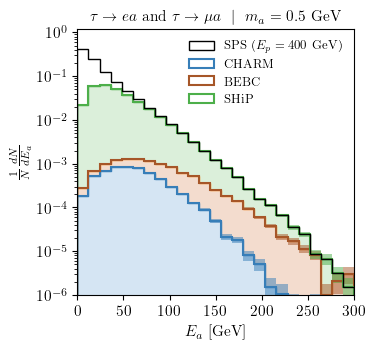

In [47]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
BINS = np.linspace(0, 300, 26)

p4, w = SHIP.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label=r'SPS ($E_p = 400$~GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False,zorder=3)

p4, w = CHARM.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'CHARM', pt.CB_color_cycle[0], nevents=CHARM.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=1.4)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)

p4, w = BEBC.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'BEBC', pt.CB_color_cycle[5], nevents=BEBC.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[4], facecolor=pt.lighten_color(pt.CB_color_cycle[5], 0.2), linestyle='-', density=False, zorder=1.3)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)

# p4, w = PROTODUNE_NP02.get_alps_in_acceptance(generate_events=True, alp=alp)
# pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'ProtoDUNE', pt.CB_color_cycle[7], nevents=PROTODUNE_NP02.nevents)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1.2)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)

p4, w = SHIP.get_alps_in_acceptance(generate_events=False, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'SHiP', pt.CB_color_cycle[2], nevents=SHIP.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.2), linestyle='-', density=False, zorder=1.1)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)


ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d E_a}$', fontsize=12)
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-5, 1.2)
ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/SPS_alp_spectrum_LFV.pdf', bbox_inches='tight')

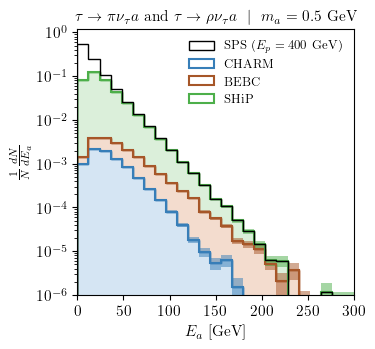

In [48]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e2, c_lepton=np.diag([1,1,1]))
xunits = 1
BINS = np.linspace(0, 300, 26)


p4, w = SHIP.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label=r'SPS ($E_p = 400$~GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False, zorder=3)

p4, w = CHARM.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'CHARM', pt.CB_color_cycle[0], nevents=CHARM.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=1.4)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)

p4, w = BEBC.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'BEBC', pt.CB_color_cycle[5], nevents=BEBC.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[5], facecolor=pt.lighten_color(pt.CB_color_cycle[5], 0.2), linestyle='-', density=False, zorder=1.3)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[5], linestyle='-', density=False, zorder=1.8)

# p4, w = PROTODUNE_NP02.get_alps_in_acceptance(generate_events=True, alp=alp)
# pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'ProtoDUNE', pt.CB_color_cycle[1], nevents=PROTODUNE_NP02.nevents)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1.2)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)

p4, w = SHIP.get_alps_in_acceptance(generate_events=False, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'SHiP', pt.CB_color_cycle[2], nevents=SHIP.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.2), linestyle='-', density=False, zorder=1.1)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)


ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d E_a}$', fontsize=12)
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-5, 1.2)
ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to \pi\nu_\tau a$ and $\tau \to \rho \nu_\tau a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/SPS_alp_spectrum_LFC.pdf', bbox_inches='tight')

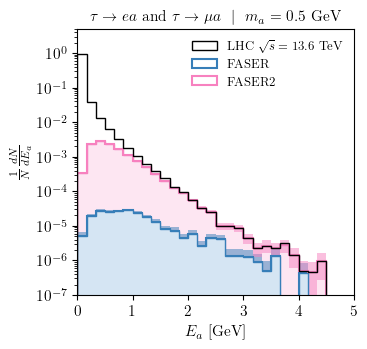

In [40]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 1e-3
BINS = np.linspace(0, 5, 31)

p4, w = FASER2.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label=r'LHC $\sqrt{s} = 13.6$~TeV', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False, zorder=3)

p4, w = FASER.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0]*xunits, w/WNORM, BINS, 'FASER', pt.CB_color_cycle[0], nevents=FASER.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=2)

p4, w = FASER2.get_alps_in_acceptance(generate_events=False, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0]*xunits, w/WNORM, BINS, 'FASER2', pt.CB_color_cycle[1], nevents=FASER2.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d E_a}$', fontsize=12)
ax.set_xlim(0,BINS.max())
ax.set_ylim(0.1e-6, 5)
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/LHC_alp_spectrum_LFV.pdf', bbox_inches='tight')

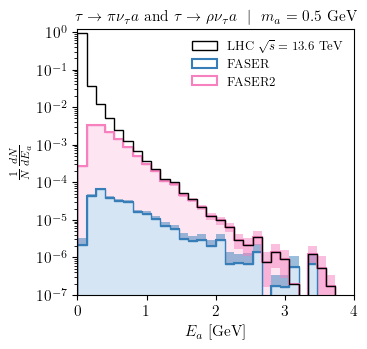

In [41]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e2, c_lepton=np.diag([1,1,1]))
xunits = 1e-3
BINS = np.linspace(0, 4, 31)

p4, w = FASER2.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label=r'LHC $\sqrt{s} = 13.6$~TeV', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False, zorder=3)

p4, w = FASER.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0]*xunits, w/WNORM, BINS, 'FASER', pt.CB_color_cycle[0], nevents=FASER.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=2)


p4, w = FASER2.get_alps_in_acceptance(generate_events=False, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0]*xunits, w/WNORM, BINS, 'FASER2', pt.CB_color_cycle[1], nevents=FASER2.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1)


ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N} \frac{dN}{d E_a}$', fontsize=12)
ax.set_xlim(0,BINS.max())
ax.set_ylim(0.1e-6, 1.2)
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to \pi\nu_\tau a$ and $\tau \to \rho \nu_\tau a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/LHC_alp_spectrum_LFC.pdf', bbox_inches='tight')

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_32300/1789578619.py:10: RuntimeWarning: divide by zero encountered in log10
  _=ax.hist2d(Cfv.get_theta_3vec(p4)*angle_units, p4[:,0]*xunits, bins=(bin_theta,bin_E), weights=-np.log10(w/np.sum(w)), cmap='Blues', linestyle='-', density=False, zorder=1.3)


ValueError: not enough values to unpack (expected 3, got 2)

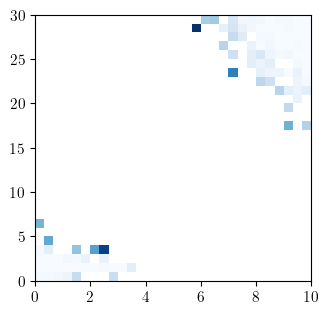

In [ ]:
alp = models.ALP(0.1, 1e5)

fig,ax = pt.std_fig(figsize=(3.5,3.5))
bin_theta = np.linspace(0, 10, 31)
bin_E = np.linspace(0, 30, 31)
angle_units = 180 / np.pi
xunits = 1

p4, w = CHARM.get_alp_events(alp=alp)
_=ax.hist2d(Cfv.get_theta_3vec(p4)*angle_units, p4[:,0]*xunits, bins=(bin_theta,bin_E), weights=-np.log10(w/np.sum(w)), cmap='Blues', linestyle='-', density=False, zorder=1.3)

# p4, w, channels = BEBC.get_alps_in_acceptance(generate_events=True, alp=alp)
# _=ax.hist2d(Cfv.get_theta_3vec(p4)*angle_units, p4[:,0]*xunits, bins=(bin_theta,bin_E), weights=w/np.sum(w), cmap='Blues', linestyle='-', density=False, zorder=1.3)

# p4, w, channels = CHARM.get_alps_in_acceptance(generate_events=True, alp=alp)
# _=ax.hist2d(Cfv.get_theta_3vec(p4)*angle_units, p4[:,0]*xunits, bins=(bin_theta,bin_E), weights=w/np.sum(w), cmap='Blues', linestyle='-', density=False, zorder=1.3)

ax.vlines([angle_units*np.arctan((EXPERIMENTS['CHARM']['dX']/2 + EXPERIMENTS['CHARM']['x0'])/EXPERIMENTS['CHARM']['L']),
           angle_units*np.arctan((EXPERIMENTS['CHARM']['x0']- EXPERIMENTS['CHARM']['dX']/2)/EXPERIMENTS['CHARM']['L'])
           ], 0, 100, color='black', lw=1, ls='--')

ax.vlines([angle_units*np.arctan((EXPERIMENTS['BEBC']['dX']/2 + EXPERIMENTS['BEBC']['x0'])/EXPERIMENTS['BEBC']['L']),
           angle_units*np.arctan((EXPERIMENTS['BEBC']['x0']- EXPERIMENTS['BEBC']['dX']/2)/EXPERIMENTS['BEBC']['L'])
           ], 0, 100, color='red', lw=1, ls='--')

ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$E_{a}$ [GeV]')

## Acceptance vs ALP mass

In [91]:
# fig, ax = pt.std_fig()

# malps = np.linspace(1e-2, 1.6, 10)

# for experiment in [ICARUS_df, MICROBOONE_df, NOVA_df, CHARM_df, BEBC_df, SHIP_df, DUNE_df]:
#     effs = []
#     for m in malps:
#         _ = experiment.get_event_rate(alp=models.ALP(m, 1e5))
#         effs.append(experiment.eff)

#     ax.plot(malps, effs, label=experiment.name)

# # ax.set_xscale('log')
# ax.set_yscale('log')
# ax.legend(ncol=2)
# ax.set_xlabel(r'$m_{a}$ [GeV]')
# fig.savefig('plots/acceptance_versus_alp_mass.pdf', bbox_inches='tight', dpi=300)